# Lab 9 - Simulation code confirming Wigner's Semicirle Law
Turgunboev Dadakhon

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### --- 1. Wigner's Semicircle Law ---

In [ ]:
 # This function returns the theoretical Wigner semicircle density
def semicircle_density(x):
    return (1 / (2 * np.pi)) * np.sqrt(np.clip(4 - x**2, 0, None))

# Generates a d x d Wigner matrix:
def generate_wigner_matrix(d):
    A = np.random.randn(d, d)
    A = (A + A.T) / 2
    A /= np.sqrt(d)
    return A

In [23]:
def plot_wigner_spectrum(d, bins=100):
    # Generate a Wigner matrix of size d x d
    W = generate_wigner_matrix(d)
    
    # Compute its eigenvalues (spectrum)
    eigenvalues = np.linalg.eigvalsh(W)

     # Create a histogram of eigenvalues
    counts, edges = np.histogram(eigenvalues, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:]) / 2

# Generate x values and the corresponding theoretical semicircle density
    x = np.linspace(-2.5, 2.5, 500)
    y = semicircle_density(x)

    # Plot both the empirical histogram and the theoretical curve
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'r-', lw=2, label='Theoretical Semicircle Density')
    plt.plot(centers, counts, 'b.', markersize=4, label='Empirical Eigenvalue Histogram')
    plt.title(f'Wigner Semicircle Law, d = {d}')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


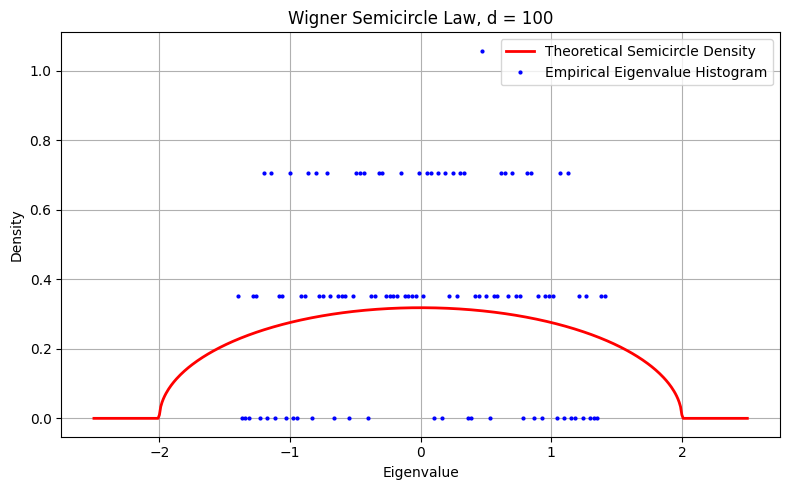

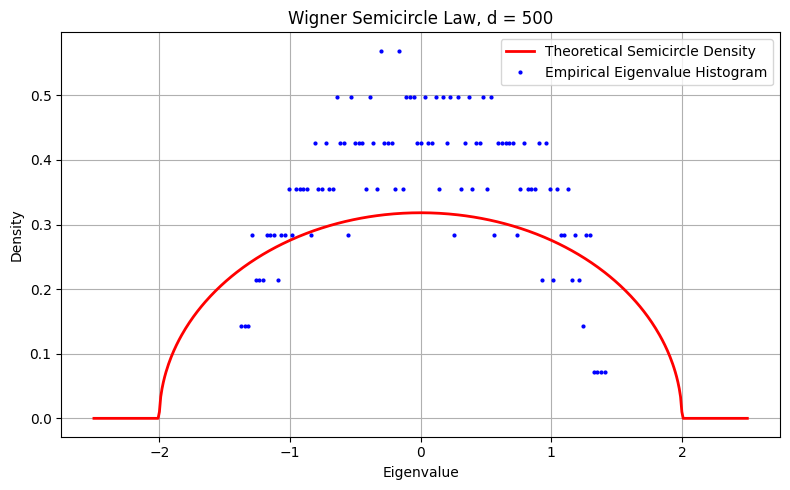

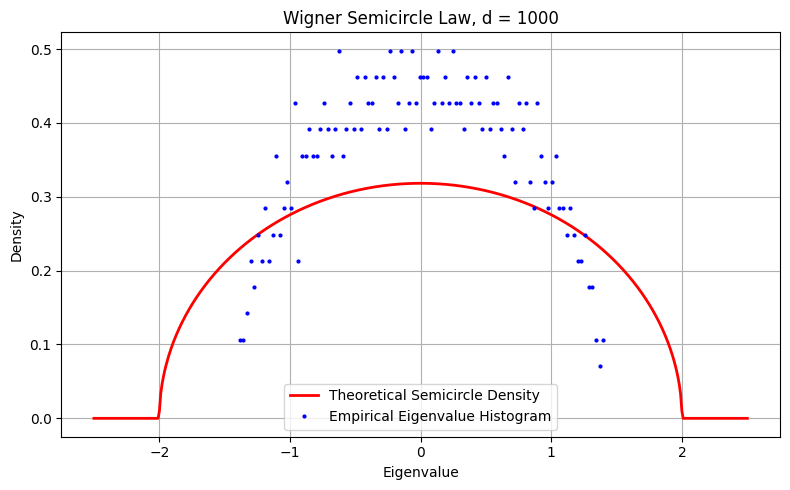

In [24]:
for d in [100, 500, 1000]:
    plot_wigner_spectrum(d)

In [ ]:
def mp_density(lamb, r):
    # This function computes the theoretical Marchenko-Pastur (MP) density
    # for a given array of eigenvalues `lamb` and aspect ratio r = d / n,
    # where d is the dimension and n is the number of samples.
    lambda_minus = (1 - np.sqrt(r))**2
    lambda_plus = (1 + np.sqrt(r))**2
    
    # Initialize the density array with zeros
    density = np.zeros_like(lamb)
     # Create a mask to apply the MP formula only within the support interval
    mask = (lamb >= lambda_minus) & (lamb <= lambda_plus)
    # Compute the MP density where valid
    density[mask] = (1 / (2 * np.pi * r * lamb[mask])) * np.sqrt((lambda_plus - lamb[mask]) * (lamb[mask] - lambda_minus))
    return density

In [7]:
def generate_cov_matrix(r, n=1000):
    m = int(r * n)
    X = np.random.randn(m, n)
    C = (1/n) * X.T @ X
    return C

In [25]:
def plot_mp_spectrum(r, n=1000, bins=100):
    # Generate a sample covariance matrix with aspect ratio r = d / n
    C = generate_cov_matrix(r, n)

    # Compute the eigenvalues of the covariance matrix
    eigenvalues = np.linalg.eigvalsh(C)

    # Create a histogram of the eigenvalues
    counts, edges = np.histogram(eigenvalues, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:]) / 2

    # Evaluate the MP density over the range of eigenvalues
    x = np.linspace(0, np.max(eigenvalues), 500)
    y = mp_density(x, r)

    # Plot both the empirical histogram and the theoretical MP curve
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'r-', lw=2, label='Theoretical Density (MP Law)')
    plt.plot(centers, counts, 'b.', markersize=4, label='Empirical Eigenvalue Histogram')
    plt.title(f'Marchenko–Pastur Law, r = {r:.2f}')
    plt.xlabel('Eigenvalue')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

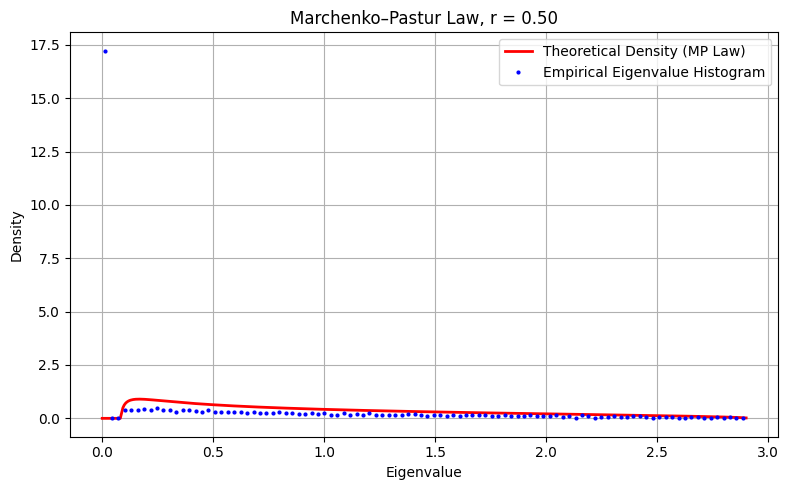

C:\Users\User\AppData\Local\Temp\ipykernel_616\179305435.py:7: RuntimeWarning: divide by zero encountered in divide
  density[mask] = (1 / (2 * np.pi * r * lamb[mask])) * np.sqrt((lambda_plus - lamb[mask]) * (lamb[mask] - lambda_minus))
C:\Users\User\AppData\Local\Temp\ipykernel_616\179305435.py:7: RuntimeWarning: invalid value encountered in multiply
  density[mask] = (1 / (2 * np.pi * r * lamb[mask])) * np.sqrt((lambda_plus - lamb[mask]) * (lamb[mask] - lambda_minus))


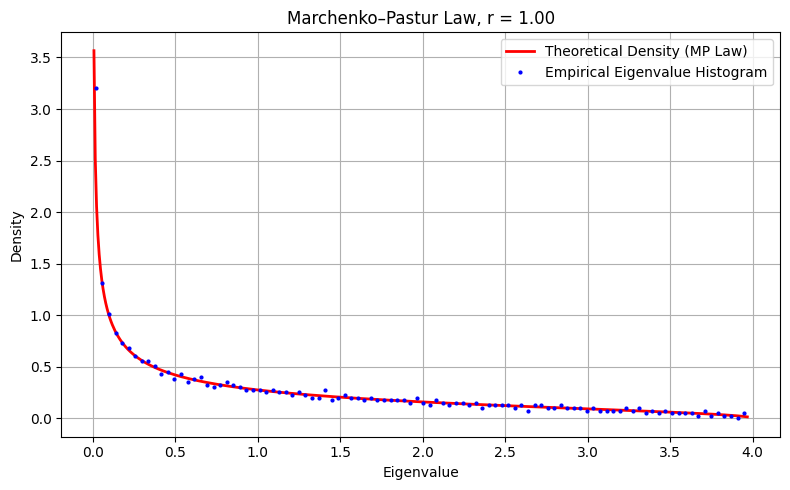

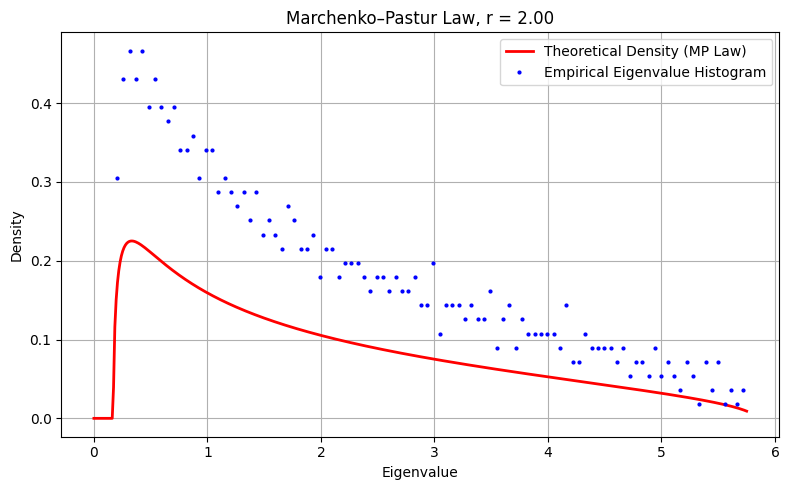

In [26]:
for r in [0.5, 1.0, 2.0]:
    plot_mp_spectrum(r)

### --- 3. Expression (5) ---

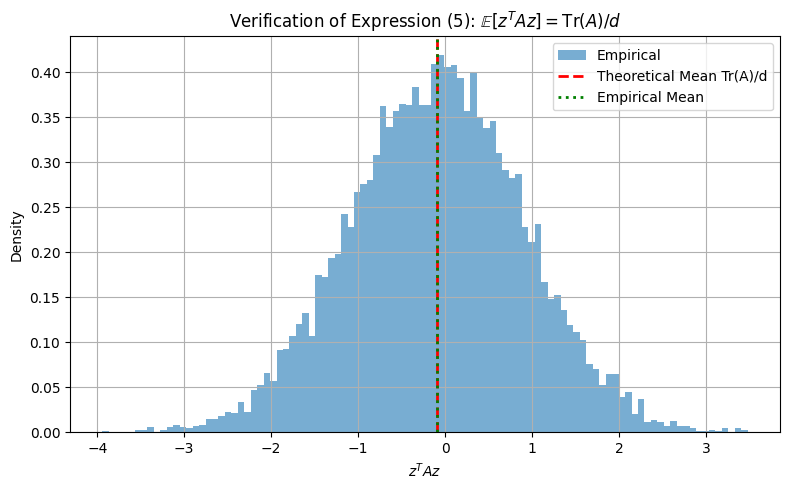

In [27]:
def simulate_expression_5(d=100, N=10000):
    # This function verifies the expectation identity:
    # E[z^T A z] = Tr(A)/d, where z is a random unit vector and A is a symmetric matrix.

    # Step 1: Generate a random symmetric matrix A ∈ ℝ^{d×d}
    A = np.random.randn(d, d)
    A = (A + A.T) / 2  # Symmetrization

    # Compute the theoretical mean: trace(A) / d
    trace_A = np.trace(A)
    theoretical_mean = trace_A / d

    # Step 2: Monte Carlo simulation to approximate E[z^T A z]
    values = []
    for _ in range(N):
        z = np.random.randn(d)           # Sample a random Gaussian vector
        z /= np.linalg.norm(z)           # Normalize to unit length
        value = z.T @ A @ z              # Compute the quadratic form
        values.append(value)             # Store the result

    # Compute empirical average from simulation
    empirical_mean = np.mean(values)

    # Step 3: Plot the histogram of simulated values
    plt.figure(figsize=(8, 5))
    plt.hist(values, bins=100, density=True, alpha=0.6, label='Empirical')
    plt.axvline(theoretical_mean, color='red', linestyle='--', linewidth=2,
                label='Theoretical Mean Tr(A)/d')
    plt.axvline(empirical_mean, color='green', linestyle=':', linewidth=2,
                label='Empirical Mean')
    plt.title('Verification of Expression (5): $\\mathbb{E}[z^T A z] = \\mathrm{Tr}(A)/d$')
    plt.xlabel('$z^T A z$')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

simulate_expression_5()

### 4. Simulate_expression 6

Theoretical variance: 0.987697
Empirical variance:    0.968871
Absolute error:         0.018826


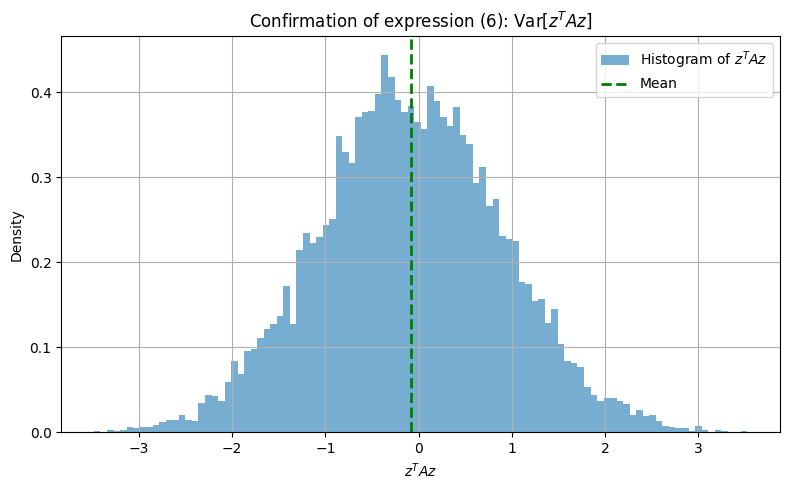

In [28]:
def simulate_expression_6(d=100, N=10000):
    # Generate a random d x d matrix from the normal distribution
    A = np.random.randn(d, d)
    
    # Make the matrix symmetric (A + A.T) / 2
    A = (A + A.T) / 2

    # Compute the trace of matrix A
    trace_A = np.trace(A)
    
    # Center the matrix by subtracting (trace_A / d) * identity matrix
    A_centered = A - (trace_A / d) * np.eye(d)
    
    # Compute the squared Frobenius norm of the centered matrix
    frob_norm_squared = np.sum(A_centered ** 2)
    
    # Theoretical variance formula for z^T A z
    theoretical_var = (2 / (d * (d + 2))) * frob_norm_squared

    values = []
    
    # Run the simulation N times to compute z^T A z
    for _ in range(N):
        # Generate a random vector z with standard normal distribution
        z = np.random.randn(d)
        
        # Normalize the vector z
        z /= np.linalg.norm(z)
        
        # Compute the quadratic form z^T A z and append to the list of values
        values.append(z.T @ A @ z)

    # Compute the mean of the simulated values
    mean_val = sum(values) / N
    
    # Compute the empirical variance
    empirical_var = sum((x - mean_val)**2 for x in values) / N

    # Print theoretical variance, empirical variance, and their absolute difference
    print(f"Theoretical variance: {theoretical_var:.6f}")
    print(f"Empirical variance:    {empirical_var:.6f}")
    print(f"Absolute error:         {abs(theoretical_var - empirical_var):.6f}")

    # Plot the histogram of simulated values and the theoretical mean
    plt.figure(figsize=(8, 5))
    plt.hist(values, bins=100, density=True, alpha=0.6, label='Histogram of $z^T A z$')
    plt.axvline(mean_val, color='green', linestyle='--', linewidth=2, label='Mean')
    plt.title('Confirmation of expression (6): $\\mathrm{Var}[z^T A z]$')
    plt.xlabel('$z^T A z$')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Run the simulation with default parameters
simulate_expression_6()

### 5. Simulate_expression 8

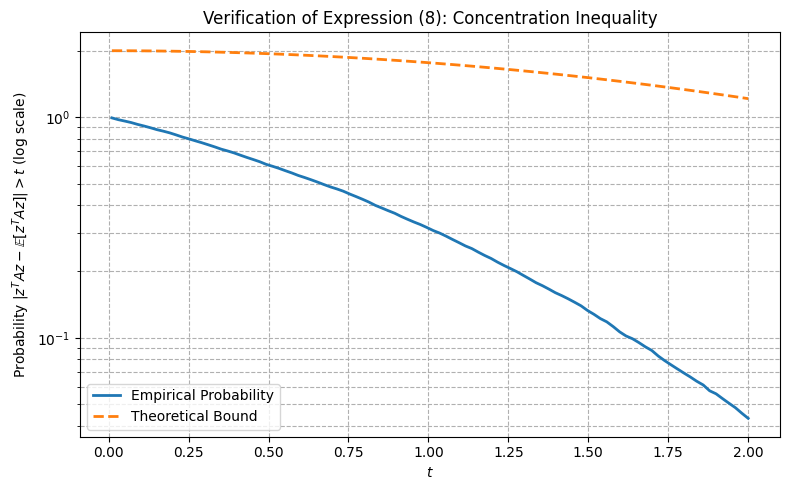

In [29]:
def simulate_expression_8(d=100, N=10000):
    A = np.random.randn(d, d)
    A = (A + A.T) / 2

    mean_theory = np.trace(A) / d

    spectral_norm = np.linalg.norm(A, ord=2)

    values = []
    for _ in range(N):
        z = np.random.randn(d)
        z /= np.linalg.norm(z)
        values.append(z.T @ A @ z)
    values = np.array(values)
    
    # Range of t values to evaluate the probabilities and bounds
    t_vals = np.linspace(0.01, 2.0, 100)
    # Lists to store empirical probabilities and theoretical bounds
    empirical_probs = []
    theoretical_bounds = []
    
# Calculate the empirical probability and theoretical bound for each t
    for t in t_vals:
        prob = np.mean(np.abs(values - mean_theory) > t)
        bound = 2 * np.exp(- (d * t**2) / (4 * spectral_norm**2))
        empirical_probs.append(prob)
        theoretical_bounds.append(bound)

    # Plotting the empirical probabilities and theoretical bounds on a log scale
    plt.figure(figsize=(8, 5))
    plt.semilogy(t_vals, empirical_probs, label='Empirical Probability', linewidth=2)
    plt.semilogy(t_vals, theoretical_bounds, '--', label='Theoretical Bound', linewidth=2)
    plt.xlabel('$t$')
    plt.ylabel('Probability $|z^T A z - \mathbb{E}[z^T A z]| > t$ (log scale)')
    plt.title('Verification of Expression (8): Concentration Inequality')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.tight_layout()
    plt.show()

# Run the simulation with default parameters
simulate_expression_8()

### 6. Simulate_expression 9

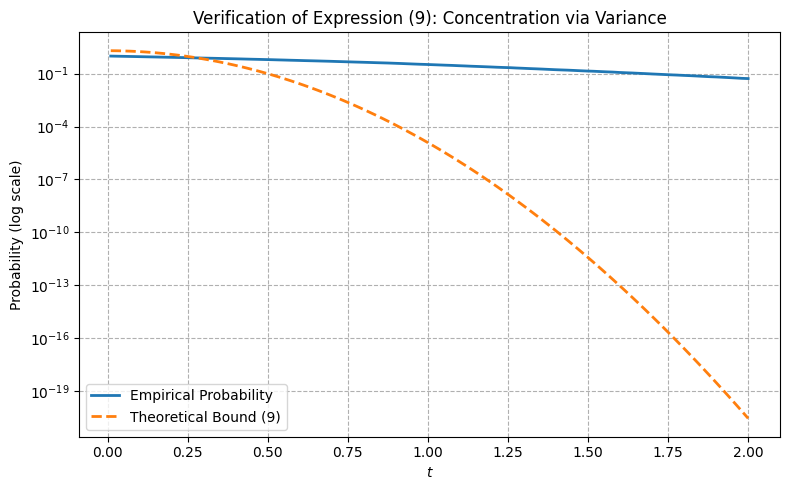

In [30]:
def simulate_expression_9(d=100, N=10000):
    A = np.random.randn(d, d)
    A = (A + A.T) / 2

    mean_val = np.trace(A) / d

    values = []
# Run the simulation N times
    for _ in range(N):
        z = np.random.randn(d)
        z /= np.linalg.norm(z)
        values.append(z.T @ A @ z)
    values = np.array(values)

    sigma2 = np.mean((values - mean_val)**2)

# Range of t values to evaluate the probabilities and bounds
    t_vals = np.linspace(0.01, 2.0, 100)

# Lists to store empirical probabilities and theoretical bounds
    empirical_probs = []
    theoretical_bounds = []

    for t in t_vals:
        prob = np.mean(np.abs(values - mean_val) > t)
        bound = 2 * np.exp(- (d * t**2) / (8 * sigma2))
        empirical_probs.append(prob)
        theoretical_bounds.append(bound)

    # Plotting the empirical probabilities and theoretical bounds on a log scale
    plt.figure(figsize=(8, 5))
    plt.semilogy(t_vals, empirical_probs, label='Empirical Probability', linewidth=2)
    plt.semilogy(t_vals, theoretical_bounds, '--', label='Theoretical Bound (9)', linewidth=2)
    plt.xlabel('$t$')
    plt.ylabel('Probability (log scale)')
    plt.title('Verification of Expression (9): Concentration via Variance')
    plt.legend()
    plt.grid(True, which="both", ls='--')
    plt.tight_layout()
    plt.show()

# Run the simulation with default parameters
simulate_expression_9()